In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from helpers import Trainer, plot_conf_mat, plot_roc, plot_roc_avg, plot_pie_chart, stats_test

random.seed(0)

In [2]:
X_cs_15 = np.load('npy_data_2/X_combinedSampling_15Features_task1.npy')
y_cs_15 = np.load('npy_data_2/y_combinedSampling_15Features_task1.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

classes = ['No', '>30', '<30']

X_cs_15.shape, y_cs_15.shape (74652, 15) (74652,)


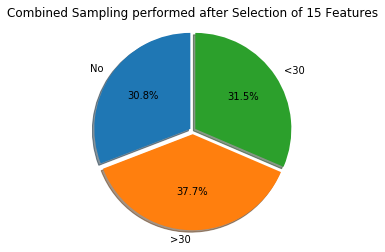

In [3]:
plot_pie_chart(classes, y_cs_15, 15)

In [4]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

In [5]:
data_classes_15  = []

for i in range(3):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
    
cls2clr = {
    0: 'red',
    1: 'green',
    2: 'blue'
}
clf2clr = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple',
    4: 'cornflowerblue',
}

In [6]:
trainer = Trainer(X=X_cs_15, y=y_cs_15, folds=folds_15, data_classes=data_classes_15, classes=classes)

----------------15 Selected Features----------------
+---------------+-----------------------+
|     Dummy     | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.0015        |
|    Accuracy   |  0.33196697545057574  |
+---------------+-----------------------+
+----------------+--------------------+---------------------+---------------------+
| Metric / Class |         No         |         >30         |         <30         |
+----------------+--------------------+---------------------+---------------------+
|   Percision    | 0.304297805868974  | 0.37386974347465884 | 0.30897672450495184 |
|     Recall     | 0.3051934676674892 |  0.3733784768115777 |  0.3085904292159555 |
|  Specificity   | 0.6887688476923131 |  0.6216431857572322 |  0.6832971308428493 |
|    F1-score    | 0.3047197951401744 |  0.3736163770475367 |  0.3087769137961688 |
+----------------+--------------------+---------------------+---------------------+
+-----+--------+-------

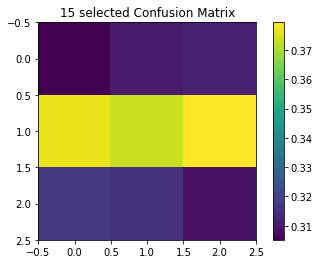

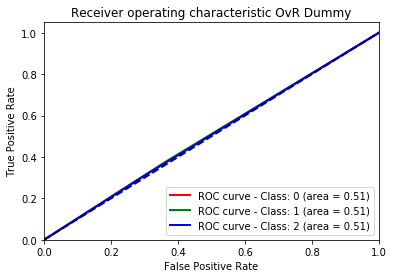

In [7]:
tables, dummy_metrics_15 = trainer.train_model(model_name='Dummy')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(dummy_metrics_15, data_classes_15, cls2clr, 'Dummy')

----------------15 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        14.4468        |
|    Accuracy   |   0.6517039227081501  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7044867069742263 | 0.5918419045348137 | 0.692624996736457  |
|     Recall     | 0.6125578844954622 | 0.6865302389347352 | 0.6483554566334726 |
|  Specificity   | 0.8853634813863103 | 0.7134535914598874 | 0.8679721328265215 |
|    F1-score    | 0.6552813733868406 | 0.6356425585334674 | 0.6696979344776761 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

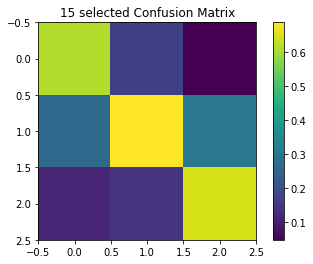

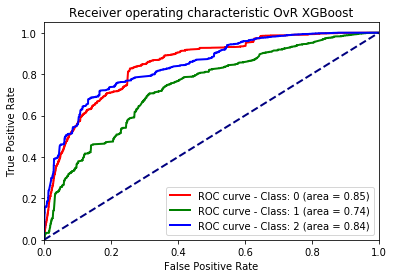

In [7]:
tables, xgboost_metrics_15 = trainer.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xgboost_metrics_15, data_classes_15, cls2clr, 'XGBoost')

----------------15 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   1.4187999999999998  |
|    Accuracy   |   0.5819937276717189  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6228981832883305 | 0.5357100041251559 | 0.6181660949670407 |
|     Recall     | 0.4898818373496135 | 0.6403017644586002 | 0.6024443508891022 |
|  Specificity   | 0.8675418475107841 | 0.6641727565775503 | 0.8290437754206893 |
|    F1-score    | 0.5482047210257223 | 0.5832433089999145 | 0.6100892516959217 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

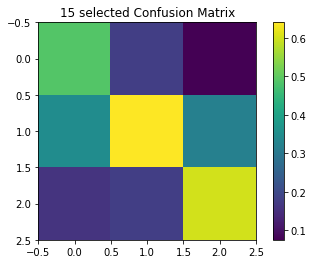

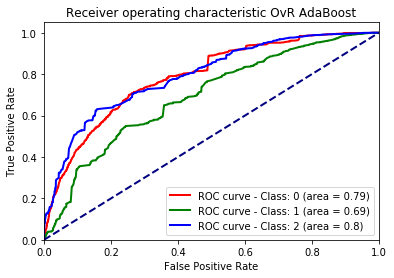

In [8]:
tables, adaboost_metrics_15 = trainer.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(adaboost_metrics_15, data_classes_15, cls2clr, 'AdaBoost')

----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         4.0987        |
|    Accuracy   |   0.9509055025784224  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9306453684029078 | 0.9521740121691418 | 0.9701012252374192 |
|     Recall     | 0.9577471571285592 | 0.9378175097615197 | 0.9598824538768536 |
|  Specificity   | 0.9681543855509913 | 0.9714894793922934 | 0.9864180444117995 |
|    F1-score    | 0.9439952067030376 | 0.9449345296784311 | 0.9649574655576952 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

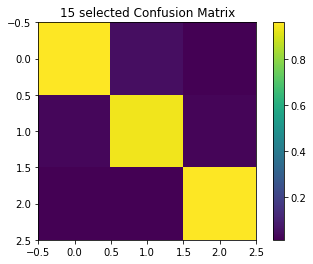

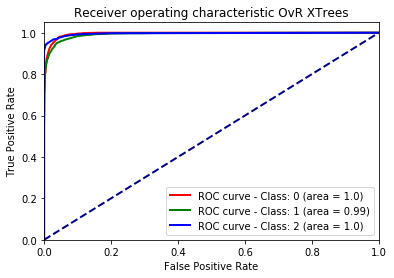

In [9]:
tables, xtrees_metrics_15 = trainer.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xtrees_metrics_15, data_classes_15, cls2clr, 'XTrees')

----------------15 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         7.0953        |
|    Accuracy   |   0.8492605872677729  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7906912379399987 | 0.8663099999081758 | 0.8902204130720006 |
|     Recall     | 0.827296715310706  | 0.843015801479787  | 0.8782846265365014 |
|  Specificity   | 0.9022936088249904 | 0.9212411614347145 | 0.9502451199951614 |
|    F1-score    | 0.8085684674536052 | 0.8544703375155285 | 0.8841706418214914 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

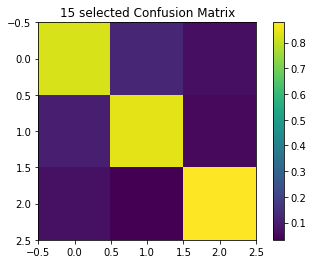

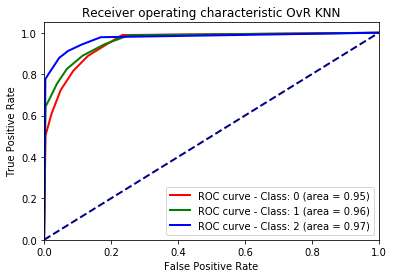

In [10]:
tables, knn_metrics_15 = trainer.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(knn_metrics_15, data_classes_15, cls2clr, 'KNN')

----------------15 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.0503        |
|    Accuracy   |   0.5464287381653719  |
+---------------+-----------------------+
+----------------+--------------------+---------------------+--------------------+
| Metric / Class |         No         |         >30         |        <30         |
+----------------+--------------------+---------------------+--------------------+
|   Percision    | 0.5452466485194465 |  0.5434202138283923 |  0.5505172975427   |
|     Recall     | 0.5677432035349955 |  0.3986778742673337 | 0.7026107379775947 |
|  Specificity   | 0.7881217298629573 |  0.7968346158632903 | 0.7367065875397298 |
|    F1-score    | 0.5558380258538639 | 0.45922530871379835 | 0.6172195013850582 |
+----------------+--------------------+---------------------+--------------------+
+-----+---------+---------+----

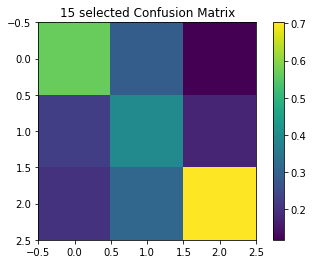

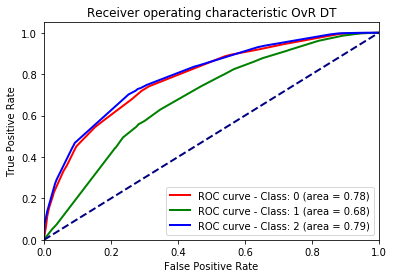

In [11]:
tables, dt_metrics_15 = trainer.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(dt_metrics_15, data_classes_15, cls2clr, 'DT')

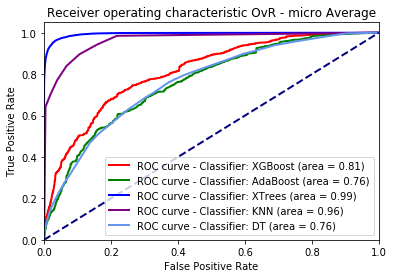

In [12]:
plot_roc_avg([xgboost_metrics_15,
                adaboost_metrics_15,
                xtrees_metrics_15,
                knn_metrics_15,
                dt_metrics_15], 
               ['XGBoost',
                'AdaBoost',
                'XTrees',
                'KNN',
                'DT'], 
               clf2clr,
            micro=True, macro=False)

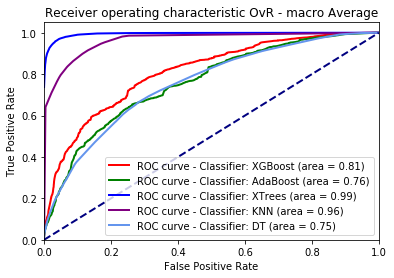

In [13]:
plot_roc_avg([xgboost_metrics_15,
                adaboost_metrics_15,
                xtrees_metrics_15,
                knn_metrics_15,
                dt_metrics_15], 
               ['XGBoost',
                'AdaBoost',
                'XTrees',
                'KNN',
                'DT'], 
               clf2clr,
               micro=False, macro=True)

In [14]:
all_scores = [xgboost_metrics_15['recall'], 
              adaboost_metrics_15['recall'], 
              xtrees_metrics_15['recall'], 
              knn_metrics_15['recall'], 
              dt_metrics_15['recall']]
all_clf = ['XGBoost',
           'AdaBoost',
           'XTrees',
           'KNN',
           'DT']
print(stats_test(all_scores, all_clf))

+------------------------------+----------+------------+------------------------+
| Classifier-1 vs Classifier-2 | avg_diff | stdev_diff |         pvalue         |
+------------------------------+----------+------------+------------------------+
|     XGBoost vs AdaBoost      |   0.07   |    0.04    | 7.973999999999999e-05  |
|      AdaBoost vs XTrees      |  -0.37   |    0.07    |          0.0           |
|       AdaBoost vs KNN        |  -0.27   |    0.06    |          0.0           |
|        AdaBoost vs DT        |   0.02   |    0.16    |        5.6e-07         |
|         XTrees vs DT         |   0.40   |    0.12    |          0.0           |
|        XTrees vs KNN         |   0.10   |    0.02    |          0.0           |
|        XGBoost vs DT         |   0.09   |    0.15    | 2.7210000000000002e-05 |
|        XGBoost vs KNN        |  -0.20   |    0.03    |          0.0           |
|          KNN vs DT           |   0.29   |    0.11    |          0.0           |
|      XGBoost v